In [3]:
from pycaret.datasets import get_data

In [4]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from pycaret.regression import *

Experiment 1

In [6]:

s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
lr = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,3.330203e+07,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,4.374648e+07,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,3.179514e+07,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,2.680530e+07,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,4.341053e+07,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,3.616633e+07,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,3.919259e+07,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,4.641504e+07,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,4.037035e+07,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,4.259679e+07,6526.6220,0.7256,0.8131,0.4802


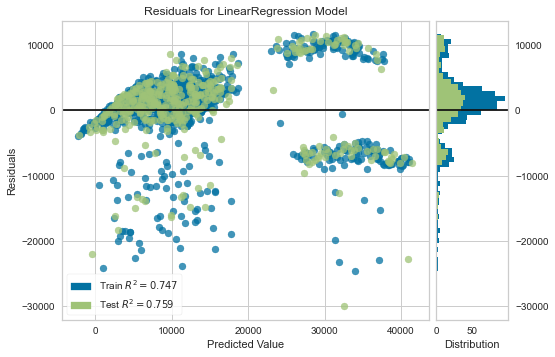

In [8]:
plot_model(lr)

Experiment : 2

In [9]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
s2[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'smoker_yes_multiply_sex_female',
       'children_0_multiply_bmi_Power2', 'children_0_multiply_age_Power2',
       'sex_female_multiply_smoker_yes',
       'region_southeast_multiply_smoker_yes',
       'children_1_multiply_smoker_yes', 'smoker_yes_multiply_children_2',
       'region_southeast_multiply_bmi_Power2',
       'children_1_multiply_age_Power2', 'children_2_multiply_age_Power2',
       'children_3_multiply_age_Power2', 'age_Power2_multiply_

In [11]:
lr = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2801.5529,2.048666e+07,4526.2195,0.8776,0.3947,0.3038
1,3606.4382,3.467647e+07,5888.6733,0.7984,0.4511,0.3492
2,3034.0875,2.340928e+07,4838.3137,0.7036,0.6123,0.3952
3,3170.6791,2.558463e+07,5058.1250,0.7864,0.5425,0.4353
4,3169.1742,2.788508e+07,5280.6328,0.7926,0.4498,0.2858
5,3226.7005,2.312381e+07,4808.7220,0.8513,0.3784,0.2861
6,2830.9071,2.393459e+07,4892.2986,0.8371,0.3869,0.3169
7,3397.2690,2.940531e+07,5422.6666,0.8383,0.4765,0.3162
8,3003.8726,2.193617e+07,4683.6061,0.8583,0.3834,0.3210
9,3156.3395,2.831477e+07,5321.1621,0.8176,0.4985,0.3540


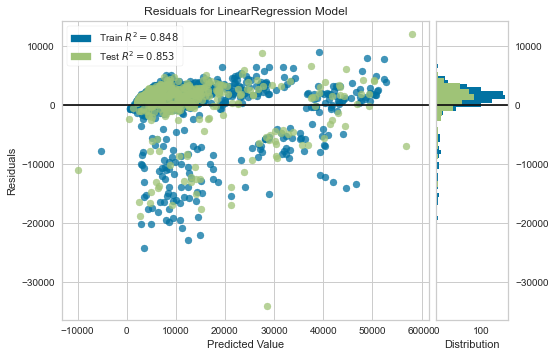

In [12]:
plot_model(lr)

In [13]:
save_model(lr,'deployment_05092021')

Transformation Pipeline and Model Succesfully Saved


In [14]:
deployment_05092021 = load_model('deployment_05092021')

Transformation Pipeline and Model Sucessfully Loaded


In [15]:
deployment_05092021

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75716.0
